# HW 3
#### By Jeremiah McReynolds

## Table of Contents
- [Loading the Data](#Loading-the-Data)
- [Assignment 1](#Assignment-1)
- [Assignment 2](#Assignment-2)
- [Assignment 3](#Assignment-3)
- [Assignment 4](#Assignment-4)

## Loading the Data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans

In [2]:
tf.__version__

'2.3.1'

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
print("MNIST Dataset:\n")
print(f"\tX_train: {X_train.shape}")
print(f"\ty_train: {y_train.shape}")
print(f"\tX_test: {X_test.shape}")
print(f"\ty_test: {y_test.shape}")

MNIST Dataset:

	X_train: (60000, 28, 28)
	y_train: (60000,)
	X_test: (10000, 28, 28)
	y_test: (10000,)


In [6]:
def flatten(data: np.ndarray) -> np.ndarray:
    """ Flattens the list of matricies to a list of ndarrays """
    return np.array([d.flatten() for d in data])

## Assignment 1

### Cluster Training
1. Flatten the MNIST `nparray` to be a 784,1
2. Use SKLearn to train on the X_train

(784,)


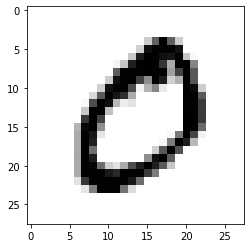

In [7]:
X = flatten(X_train)  ## Flatten so that we can use with sklearn
print(X[0].shape)
plt.figure()
fig = plt.imshow(X[1].reshape(28,28))
fig.set_cmap('gray_r')

In [8]:
kmeans = KMeans(n_clusters=10).fit(X)

### Accuracy Computation
1. Get predicted label using the mode of each cluster
2. Compute the training accuracy
3. Compute the testing accuracy
4. Report results

#### Define Function
1. `mode` calculates the most reported label in a cluster
2. `get_label_class` gets the predicted label of the cluster based on most votes
3. `accuracy` calculates the accuracy of the label prediction based on the cluster of the sample

In [9]:
def mode(labels: list):
    """ Returns the mode given a list of items 
        Fast one-line solution from: https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list
    """        
    return max(set(labels), key=labels.count)

def get_label_class(cluster_labels: np.ndarray, y: np.ndarray) -> dict:
    """ Computes the labels and returns the labels in a dictionary format:
        {
            "cluster1": "pred_num",
        }
    """
    labels = dict()
    for i, label in enumerate(cluster_labels):
        if not labels.get(label):
            labels[label] = []
        labels[label].append(y[i])
        
    for k, v in labels.items():
        labels[k] = mode(v)
        
    return labels

cluster_labels = get_label_class(kmeans.labels_, y_train)
cluster_labels.keys(), cluster_labels.values()

(dict_keys([8, 9, 2, 6, 4, 5, 3, 1, 7, 0]),
 dict_values([8, 0, 4, 1, 7, 2, 1, 3, 6, 6]))

In [10]:
def accuracy(cluster_labels: np.ndarray, y: np.ndarray, label_class: dict) -> float:
    """ Computes the accuracy """
    total = cluster_labels.shape[0]
    correct = 0.0
    for i, label in enumerate(cluster_labels):
        actual = y[i]
        pred = label_class[label]
        correct += float(actual == pred)
    return correct / total

#### Get Cluster Accuracy of the Training Data

In [11]:
a_train = accuracy(kmeans.labels_, y_train, cluster_labels)

#### Get Cluster Accuracy of the Testing Data

(784,)


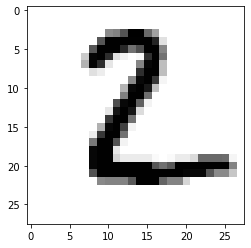

In [12]:
X = flatten(X_test)  ## Flatten so that we can use with sklearn
print(X[0].shape)
plt.figure()
fig = plt.imshow(X[1].reshape(28,28))
fig.set_cmap('gray_r')

In [13]:
test_clusters = kmeans.predict(X)
test_clusters

array([4, 0, 6, ..., 4, 0, 7], dtype=int32)

In [14]:
a_test = accuracy(test_clusters, y_test, cluster_labels)
results = [
    ["Train", a_train],
    ["Test", a_test]
]

#### Reporting Accuracy Results

In [15]:
def report_results(results):
    columns = ["Data Type", "Accuracy"]
    max_len = len(max(columns, key=lambda x: len(x)))
    header = " | ".join('{0:{width}}'.format(col, width=max_len) for col in columns)
    print(header)
    print("-" * len(header))
    for r in results:
        accuracy = round(r[1] * 100, 5)
        line = [r[0], accuracy]
        print(" | ".join('{0:{width}}'.format(str(r), width=max_len) for r in line))
        
report_results(results)

Data Type | Accuracy 
---------------------
Train     | 58.27167 
Test      | 58.88    


## Assignment 2

| Model | Description | Pros | Cons | Suitability |
|:--------------------|:------------|:-----|:-----|:------|
| **Logistic Regression** | A multiclass classifier algorithm that uses the softmax sigmoid function <br> to compute the posterior distribution of a sample. | - Efficient <br> - Outputs the posterior distribution <br> - Easy to calculate feature importance | - Assumes linerarly separable data <br> - Requires no multicolinerarity <br> - Can be overfit with highly dimensional data | This technique isn't very suitable for this data because the data is highly dimensional and likely not very separable (given that a clustering technique has only 60% accuracy). |
| **SVM** | Support Vector Machines (SVMs) finds a hyperplane that maximizes the <br> margin of separation between the distinct classes in a dataset. It has the ability to use kernels to project the data onto higher plans, if need be |  - Can use Kernels <br> - Effective in high dimensional data <br> - Performs especially well when data is separable | - Computationally expensive, especially with large data sets <br> - Not very good with noisy data <br> - Underperforms when data cannot be separated effectively | This technique may be better suited because the data is highly dimensional and may be linearly separable when projected onto even higher planes using a kernel. However, it may take a long time to train due to the complexity of kernelizing and the high volume of data |
| **Decision Tree** | An algorithm that smartly splits the data based on rules into a tree-based structure such that the target can be accuractely predicted | - Can be used for both classification and regression <br> - Easy to interpret rules and output <br> - Able to robustly handle all types of data, including missing values <br> - Preprocessing not as necessary with this algorithm | - Can become very complex very quickly, <br> - Algorithm can be quite greedy, <br> - Split rules are very important <br> - Small data changes can greatly affect decision tree rules <br> - Prone to overfitting  | Although this technique may work, it is likely that it will overfit and become highly complex due to the high dimensionality of the data |
| **Random Forest** | An ensemble of decision trees that are used to predict new examples by "majority vote" | - Highly effective <br> - Flexible for many different types of data <br> - Robust to outliers <br> - Almost no preprocessing required | - Black box (not easy to understand why a decision was reached) <br> - Training can take a long time <br> - Can be very complex | This technique will likely be very good and efficient due to the "majority" vote structure.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

### Random Forest

In [17]:
x_train = flatten(X_train)
x_test = flatten(X_test)

In [18]:
tree = RandomForestClassifier().fit(x_train, y_train)
tree

RandomForestClassifier()

In [19]:
x_pred = tree.predict(x_train)
sklearn.metrics.accuracy_score(x_pred, y_train)

1.0

In [20]:
x_pred = tree.predict(x_test)
sklearn.metrics.accuracy_score(x_pred, y_test)

0.9703

### SVM

In [21]:
x_train = StandardScaler().fit_transform(flatten(X_train))
x_test = StandardScaler().fit_transform(flatten(X_test))

In [22]:
svm = SVC().fit(x_train, y_train)
svm

SVC()

In [23]:
svm.score(x_train, y_train)

0.9866333333333334

In [24]:
svm.score(x_test, y_test)

0.9656

### Assignment 3

In [25]:
from typing import Tuple
from skimage import io, color, util
from skimage.transform import resize
import os
import pandas as pd

In [26]:
input_dir = 'figures'

if not os.path.exists(input_dir) and not os.path.isdir(input_dir):
    raise OSError("Input directory must exist and must be a directory")

manifest = pd.read_csv(os.path.join(input_dir, "manifest.csv"))

In [27]:
def load_imgs(manifest: pd.DataFrame, input_dir: str) -> Tuple[np.ndarray, np.ndarray]:
    """ Loads the images """
    imgs = []
    targets = []
    for idx, row in enumerate(manifest.iterrows()):
        name, target = row[1]
        filepath = os.path.join(input_dir, name)
        imgs.append(io.imread(filepath))
        targets.append(target)
    return np.array(imgs), np.array(manifest['target'])

imgs, labels = load_imgs(manifest, input_dir)
imgs.shape

(50, 4032, 3024, 3)

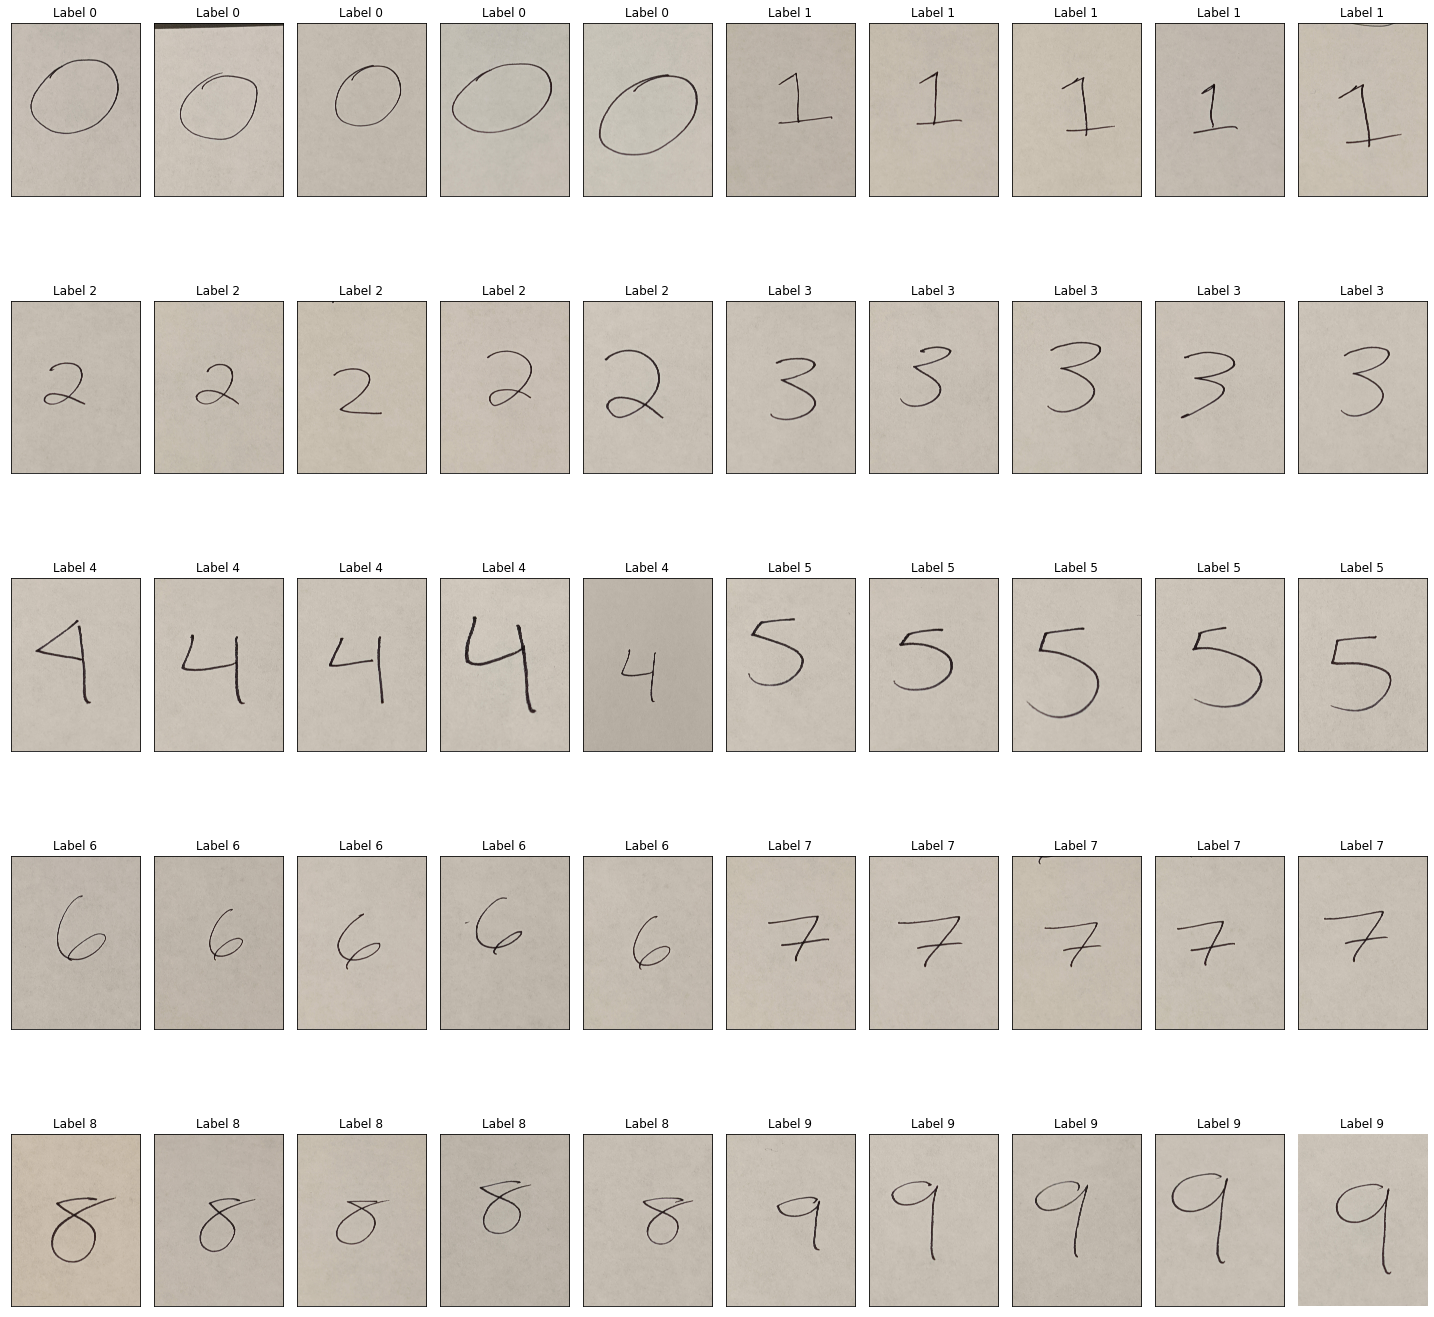

In [28]:
def display_imgs(imgs: np.ndarray, labels: np.ndarray) -> None:
    """ Displays all 50 images that were hand drawn """
    fig, axes = plt.subplots(5, 10, figsize=(20,20))
    for idx, img in enumerate(imgs):
        target = labels[idx]
        x = idx // 10
        y = idx % 10
        axes[x,y].imshow(img)
        axes[x,y].set_title(f"Label {target}")
        axes[x,y].set_xticks([])
        axes[x,y].set_yticks([])
    plt.tight_layout(True)
    plt.axis('off')
    plt.show()

display_imgs(imgs, labels)

In [29]:
def preprocess_imgs(imgs: np.ndarray) -> np.ndarray:
    """ Resizes the images to be 28, 28, grayscale and of proper rotation. Returns the matrix form """
    data = []
    for img in imgs:
        img = util.invert(color.rgb2gray(img))
        form = resize(img, (28,28))
        data.append(form.flatten())
    return np.array(data)

data = preprocess_imgs(imgs)

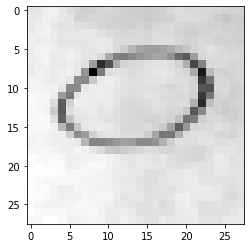

In [30]:
plt.figure()
fig = plt.imshow(data[0].reshape((28,28)))
fig.set_cmap('gray_r')

In [31]:
data[0].shape

(784,)

In [32]:
data.shape

(50, 784)

## Assignment 4

Using the tutorial from this tensorflow post: https://www.tensorflow.org/tutorials/images/cnn

In [33]:
from tensorflow.keras import layers, models

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

def reshape(data: np.ndarray) -> np.ndarray:
    """ Shapes data into the proper shape for the CNN """
    return data.reshape((data.shape[0], 28, 28, 1))

train_images = reshape(X_train)
test_images = reshape(X_test)
hand_images = reshape(data)
hand_labels = labels

In [34]:
hand_images.shape

(50, 28, 28, 1)

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=3, 
                    validation_data=(test_images, y_test))

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1526 - accuracy: 0.9532 - val_loss: 0.0572 - val_accuracy: 0.9803
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0410 - val_accuracy: 0.9858
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0315 - val_accuracy: 0.9896


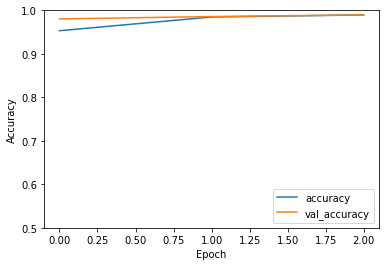

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [40]:
test_loss, test_acc = model.evaluate(test_images,  y_test, verbose=2)
hand_loss, hand_acc = model.evaluate(hand_images, hand_labels, verbose=2)

313/313 - 0s - loss: 0.0315 - accuracy: 0.9896
2/2 - 0s - loss: 2.1998 - accuracy: 0.2000


### Reporting Results for Hand Drawn Images

In [41]:
def score(data: np.ndarray, y: np.ndarray, model) -> float:
    """ Computes the accuracy score """
    return model.score(data, y)

def report_results(results):
    columns = ["Model", "Data Type", "Accuracy"]
    max_len = len(max(columns, key=lambda x: len(x)))
    header = " | ".join('{0:{width}}'.format(col, width=max_len) for col in columns)
    print(header)
    print("-" * len(header))
    for r in results:
        accuracy = round(r[2] * 100, 5)
        line = [r[0], r[1], accuracy]
        print(" | ".join('{0:{width}}'.format(str(r), width=max_len) for r in line))

results = [
    ["KMeans", "Hand Drawn", accuracy(kmeans.predict(data), hand_labels, cluster_labels)],
    ["SVM", "Hand Drawn", score(data, hand_labels, svm)],
    ["RF", "Hand Drawn", score(data, hand_labels, tree)],
    ["CNN", "Hand Drawn", hand_acc]
]
report_results(results)

Model     | Data Type | Accuracy 
---------------------------------
KMeans    | Hand Drawn | 10.0     
SVM       | Hand Drawn | 10.0     
RF        | Hand Drawn | 10.0     
CNN       | Hand Drawn | 20.0     
